<a href="https://colab.research.google.com/github/coramusungu/Text-Analytics/blob/main/Text_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Descriptive text analytics is conceerned with with large volumes of unstructured text that are processed into qualitative data so as to provide insights from the data.

## **Text Analytics Terminology**  
- **Stop Words:** These are common words that have very little meaning or low analytic value and are usually removed during preporocessing examples include: 'a', 'and', 'however', 'but'
- **Stemming:** This is the roof of the word. Examples include *'mining'* can be reduced into *'mine'*, *'foxes'* can be reduced into *'fox'*
- **Text Corpus:** These can be written or spoken words that can be analyzed to find keywords or interesting patterns between words.

## **Applications of Text Analytics** 
1. *Prevent CyberCrime* - used to discover social relations between criminals from unstructured text 
1. *Sentiment Analysis* - Extracting opinions, emotions, sentiments and their relations with other products
1. *Document Clustering and frequent Patterns* - Checking interesting relationships in a set of documents

## **Methodology for Descriptive Text Analytics**
### 1. Text Data PreProcessing

i. Selection and loading Text Analytics libraries, the source data and the dataset.


In [1]:
#1. select the libraries
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# 2. select the data from the source
from google.colab import files
uploaded = files.upload()

Saving Corona_NLP_train.csv to Corona_NLP_train.csv


In [3]:
#3. encode the text dataset and print the shape of the data
tweetdata_ = pd.read_csv('Corona_NLP_train.csv', encoding = 'latin1')
print('The shape of the data frame is :\n', tweetdata_.shape)

tweetdata = tweetdata_.sample(2000)
#4. select a sample with a certain number of records
tweetdata.head()

The shape of the data frame is :
 (41157, 6)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
19881,23680,68632,"Concord, NH",24-03-2020,"As the coronavirus (COVID-19) continues, so wi...",Extremely Negative
40066,43865,88817,"Washington, DC",13-04-2020,WATCH THAT BACON ?:\r\r\n More than 1/2 of co...,Positive
1480,5279,50231,Canada,17-03-2020,Precautions are in place and the Manna Food Ba...,Positive
4780,8579,53531,"Dallas, TX",18-03-2020,I salute all the unsung heroes in this outbrea...,Extremely Positive
24986,28785,73737,"Fairfax, VA USA",29-03-2020,"Only in America, can you cook yourself a huge ...",Positive


ii. Data Cleaning by removing error, missing values and inconsistencies from the data so as to improve quality of data

In [4]:
#i. Check the sum of missing Values
#a. checking for records with missing(null) values in 'description'
tweetdata['OriginalTweet'].isnull().sum()

#b. Drop all records with missing values 
tweetdata = tweetdata.dropna()
print(tweetdata)

       UserName  ...           Sentiment
19881     23680  ...  Extremely Negative
40066     43865  ...            Positive
1480       5279  ...            Positive
4780       8579  ...  Extremely Positive
24986     28785  ...            Positive
...         ...  ...                 ...
10473     14272  ...  Extremely Positive
2473       6272  ...            Negative
29065     32864  ...            Negative
25783     29582  ...            Positive
37574     41373  ...            Negative

[1571 rows x 6 columns]


iii. Data Transformation by changing the text, splitting the text in separate words, removing stop words and stemming to put it in a format that is suitable for performing analytics.

In [5]:
#i. create an array to store the transformed data
transformed_tweets = []

#ii. Convert the data to lowercase
tweets_lowcase = tweetdata['OriginalTweet'].str.lower()

#iii. Split the text to separate words
split_tweets = tweets_lowcase.str.split(' ')

#iv. remove punctuations
for text in split_tweets:
  text = [x.strip(string.punctuation) for x in text]
  transformed_tweets.append(text)

#v. output transformed data
print(transformed_tweets) 

[['as', 'the', 'coronavirus', 'covid-19', 'continues', 'so', 'will', 'scams', 'and', 'the', 'spread', 'of', 'misinformation', 'take', 'a', 'look', 'at', 'some', 'specific', 'examples', 'of', 'covid-19', 'scams', 'provided', 'by', 'the', 'ftc', 'https://t.co/2erw4txvvf'], ['watch', 'that', 'bacon', '\r\r\n', '', 'more', 'than', '1/2', 'of', 'confirmed', 'coronavirus', 'cases', 'in', 'all', 'south', 'dakota', 'are', 'employees', 'of', 'the', 'smithfield', 'pork', 'slaughterhouse', 'and', 'packaging', 'plant', 'in', 'sioux', 'falls.\r\r\n', '', '', 'gt', 'plant', 'is', 'shutting', 'down.\r\r\n', '', '', 'might', 'want', 'to', 'reconsider', 'your', 'breakfast', 'sausage.\r\r\nhttps://t.co/fmd6cemfxo'], ['precautions', 'are', 'in', 'place', 'and', 'the', 'manna', 'food', 'bank', 'of', 'bracebridge', 'continues', 'to', 'serve', 'their', 'clients', 'however', 'they', 'do', 'anticipate', 'their', 'demand', 'will', 'increase', 'as', 'the', 'pandemic', 'escalates'], ['i', 'salute', 'all', 'the',

iv. Text Integration which involves joining the stems/basic words that remained after stemming

In [6]:
#Integrate sample data to create text corpus
text_corpus = [" ".join(text) for text in transformed_tweets]
final_text_corpus = " ".join(text_corpus)
print(final_text_corpus)

### **2. Applying Text Analytics Methods**
They include the following:
- Word Frequency
- Collocation
- Concordance
- Word Spotting
- Topic Modelling
- Thematic Analysis
- Clustering
- Text Classification

#### **1. Word Frequency**
This is used tolist the most frequently occuring words in a given text. This can be useful for example in words/expression used by customers most frequently. For example if the word **delivery** appears most, this could suggest that there is a problem with the delivery services.

In [36]:
stopwords = set(STOPWORDS)

#updating the stopwords to those specific to our data
stopwords.update(["19", "co", "https", "amp", "U", "will", "fucking", "Comment", "s"])

In [37]:
filtered_tweets = [word for word in final_text_corpus.split() if word not in stopwords]
counted_words_spam = collections.Counter(filtered_tweets)

word_count_spam = {}

for letter, count in counted_words_spam.most_common(30):
    word_count_spam[letter] = count
    
for i,j in word_count_spam.items():
        print('Word: {0}, count: {1}'.format(i,j))

Word: coronavirus, count: 640
Word: covid-19, count: 301
Word: food, count: 291
Word: prices, count: 281
Word: supermarket, count: 271
Word: store, count: 244
Word: grocery, count: 210
Word: people, count: 199
Word: consumer, count: 181
Word: covid19, count: 158
Word: online, count: 129
Word: pandemic, count: 123
Word: shopping, count: 121
Word: now, count: 111
Word: covid, count: 110
Word: covid_19, count: 102
Word: workers, count: 99
Word: demand, count: 97
Word: home, count: 97
Word: panic, count: 95
Word: help, count: 93
Word: time, count: 92
Word: need, count: 89
Word: sanitizer, count: 85
Word: new, count: 79
Word: hand, count: 76
Word: work, count: 72
Word: go, count: 71
Word: stock, count: 71
Word: us, count: 70


#### **2. Collocation**
Helps Identify words that commonly co-Occur. This can be very helpful to identify hidden semantic structures and improve granularity of the insights by counting bigrams(two adjacent words eg *customer support*) and trigrams (three adjacent words eg *to be continued*) of one word.  

#### **3. Concordance**
This is used to recognize the particular context/Instance in which a word/set of words appear. This helps in understanding the exact meaning of a word based on context. For example the word *Work*.

#### **4. Word Spotting**  
This handwriting recognition. For example, spotting which word a doctor has written. Involves matching the handwritten words with stored word images to provide similarity information that is needed by the clustering algorithm.

#### **5. Topic Modelling**
This is the method for finding a topic from a collection of documents/words that best represents the information in the collection. These include Latent Dirichlet Allocation (LDA) and the TextRank process.

In [7]:
#Converting text document into a matrix
from sklearn.feature_extraction.text import CountVectorizer 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = cv.fit_transform(tweetdata['OriginalTweet'])

In [8]:
#LDA (Latent Dirichlet Allocation) for grouping the words associated with each topic
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=5)  # This model takes a while when the data is huge
LDA.fit(dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [9]:
#1. Checking the number of Stored Words
len(cv.get_feature_names())

2857

In [10]:
#2. Showing Top 5 Words Per Topic
print(len(LDA.components_[0]))
single_topic = LDA.components_[0]

#3. showing the number of words associated with each topic
single_topic.argsort()[-5:]

2857


array([ 617,   16, 1037,  578, 1265])

In [11]:
#4. Singling out the topics
top_word_indices = single_topic.argsort()[-5:]
for index in top_word_indices:
    print(cv.get_feature_names()[index])

covid
19
food
coronavirus
https


In [12]:
#5. Printing out the words associated with each topic
for index,topic in enumerate(LDA.components_):
    print(f'TOPIC {index} TOP 10 WORDS')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

TOPIC 0 TOP 10 WORDS
['supermarket', 'workers', 'store', 'grocery', 'panic', 'covid', '19', 'food', 'coronavirus', 'https']


TOPIC 1 TOP 10 WORDS
['prices', 'people', 'grocery', 'covid', 'store', '19', 'amp', 'food', 'https', 'coronavirus']


TOPIC 2 TOP 10 WORDS
['shopping', 'online', 'supermarket', 'people', 'oil', 'coronavirus', 'prices', 'covid', '19', 'https']


TOPIC 3 TOP 10 WORDS
['prices', 'people', 'online', '19', 'covid', 'consumer', 'covid19', 'supermarket', 'coronavirus', 'https']


TOPIC 4 TOP 10 WORDS
['covid19', 'people', 'supermarket', '19', 'covid', 'grocery', 'store', 'food', 'https', 'coronavirus']




In [13]:
#6. Attaching Discovered Topic Labels to Original Articles
tweetdata['Topic'] = LDA.transform(dtm).argmax(axis=1)
tweetdata.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Topic
19881,23680,68632,"Concord, NH",24-03-2020,"As the coronavirus (COVID-19) continues, so wi...",Extremely Negative,2
40066,43865,88817,"Washington, DC",13-04-2020,WATCH THAT BACON ?:\r\r\n More than 1/2 of co...,Positive,1
1480,5279,50231,Canada,17-03-2020,Precautions are in place and the Manna Food Ba...,Positive,0
4780,8579,53531,"Dallas, TX",18-03-2020,I salute all the unsung heroes in this outbrea...,Extremely Positive,0
24986,28785,73737,"Fairfax, VA USA",29-03-2020,"Only in America, can you cook yourself a huge ...",Positive,3
8753,12552,57504,??,20-03-2020,STOP PANIC BUYING You re shaming yourselves an...,Extremely Negative,1
25577,29376,74328,Anywhere there is light,01-04-2020,As people spend more time shopping online one ...,Positive,3
19169,22968,67920,"Oldenburg, Germany",24-03-2020,Sounds dramatic but do the maths Wrap reckon 1...,Extremely Negative,4
20260,24059,69011,Canada,24-03-2020,6 work from home tips for better video calls. ...,Positive,3
28414,32213,77165,United Kingdom,04-04-2020,Diversification has failed Here s how to inve...,Negative,1


#### **6. Text Clustering**
This is the grouping of elements to form clusters that are more similar to each other than those in different clusters. The algorithms find natural clusters in the data

#### **7. Thematic Analysis**
These extract themes from text rather than categorize the text. This is achieved through merging phrases that are similar into themes and then organizing them in a way that is easy for people to review and edit.

The goal of a thematic analysis is to identify themes, i.e. patterns in the data that are interesting. From the above tweets, we can see that for the period of April and March 2020, around the world, people were tweeting links. The links could be for online shopping or tracking of covid cases. The people were tweeting on corona virus(covid), shopping for food at the grocery shops, supermarkets and online.

### **2. Visualization Techniques**
- Document Term Matrix (DTM)
- Frequency Graph
- Network Analysis Graph
- Word Cloud
- Dendogram

#### **1. Document Term Matrix (DTM)**
This is a matrix with documents designated by rows and words by columns, the elements are counts or the weights. When we transpose this, we get Term Document Matrix (TDM).

#### **2. Network  Analysis Graph**
The main idea of this is to count pairwise the relative occurence of words. The notations used are:
- Vertices or Nodes to represent Words
- Lines/Edges connecting the nodes and are used to represent the relationship between coocurring words
- Size of the nodes represents the number of words in the TDM corresponding to each item
- Values on the edges and the width represnts the strength of the relationship between words. The larger the value and the thicker the line, the greater the similarity between the words.

*Applications of Network Analysis Graph*
1. Marketing Analysis - Graphs can be used to figure out the most influential people in a social network. This helps marketers to decide on who to use for product endorsements.
2. Banking Transactions - Unusual patterns can be found by using Graphs eg terrorost activities has been detected by analyzing the flow of money accross interconnected Banking networks
3. Supply Chain - Graphs help in identifying optimum routes for delivery trucks and in identifying warehouse locations to delivery centres.
4. Pharma - Travelling Sales Man Problem 

#### **3. Dendrogram** 
This is a diagram that shows the hierarchical relationship between objects and works to allocate objects to clusters.

*   The height at which any two objects are joined indicates similarity.
*   The height reflects the distance between the clusters. This indicates how similar/different they are from each other.



#### **4. Word Cloud** 
This is a collection of words depicted in different sizes. It displays how frequently words appear in a given body of text by making the size of the word proportiona to the word frequency with the most important words being the biggest and boldest.

*Applications:*
1.   To analyze feedback from customers to see what customers like/hate most about the business.
2.   To understand how employees feel about a company, can turn a pile of information to an immediately valuable company feedback to help drive the company culture
3. Word Clouds can be used on website to depict tag usage

*Limitations:*
1. Long words are emphasized over short words
2. They are not great for analytical accuracy, used more for aesthetic reasons
3. Words whose letters contain ascenders and descenders may receive more attention

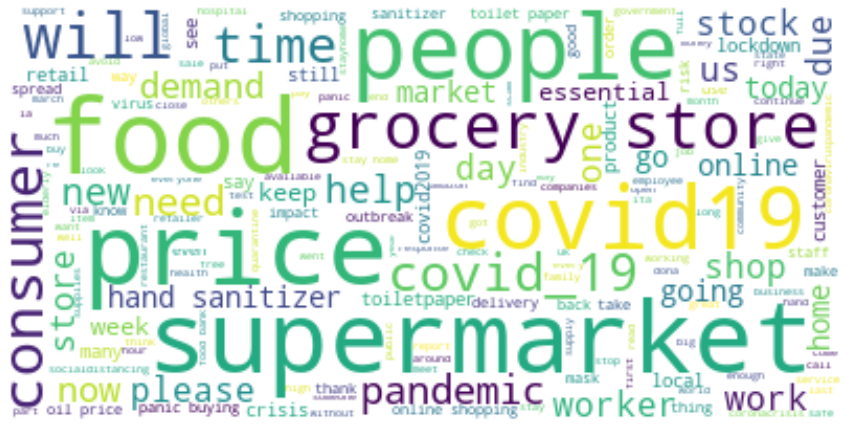

In [14]:
stopwords = set(STOPWORDS)

#updating the stopwords to those specific to our data
stopwords.update(["t", "co", "https", "amp", "U", "fuck", "fucking", "Comment", "covid", "coronavirus"])

#generating the wordcloud on the fibal text corpus data
wordcloud_spam = WordCloud(stopwords=stopwords, background_color="white", max_font_size=50, max_words=500).generate(final_text_corpus)

#plot the model
plt.figure(figsize = (15,15))

#to make the image appear smoother
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

From the above, we can see that people were mostly tweeting on supermarket, shopping and getting groceries and consumer products. This method helps us to have a rough idea on what people are talking about.

### 3. Post Processing
This involves interpreting, evaluating, filtering, and visualizing the results of text analytics. 
- Visualizing techniques include Word Clouds, Contigency Tables and network graphs
- Data Summarization entails generating compact descriptions of analytic results by grouping various pieces of knowledge and representing them in form of text descriptions
- Interpretations refers  to the activity of decoding the meaning and implications of Text Analytics Results

# 2. Sentiment analysis
## 2.1 With SentimentIntensityAnalyzer




In [16]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [17]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral"      

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [18]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

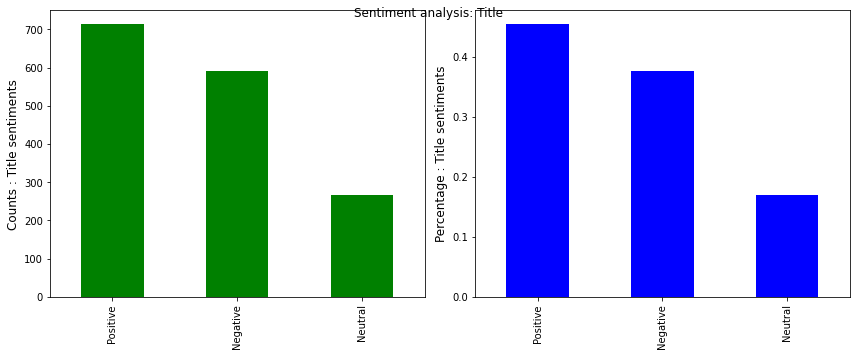

In [22]:
tweetdata['title_sentiment'] = tweetdata['OriginalTweet'].apply(lambda x: find_sentiment(x))
plot_sentiment(tweetdata, 'title_sentiment', 'Title')

In [ ]:
show_wordcloud(tweetdata.loc[tweetdata['title_sentiment']=='Neutral', 'OriginalTweet'], title = 'Prevalent words in titles (Neutral sentiment)')